In [25]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

The Boston Housing dataset contains 14 columns, including the target column (which contains the median value of owner-occupied homes in $1000's). The 13 input features are:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

The target column is the last column in the dataset and contains the median value of owner-occupied homes in $1000's. Therefore, the input data consists of 13 numerical features, and the target variable is a continuous numerical variable.

#### Load Data

In [14]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

#### Scale Data

In [15]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

#### Define Model

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [20]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 498.0879 - mae: 20.3563 - val_loss: 491.1124 - val_mae: 20.2909
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 356.5457 - mae: 16.8453 - val_loss: 331.3369 - val_mae: 16.1909
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 209.9243 - mae: 12.2417 - val_loss: 182.6902 - val_mae: 10.9613
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 103.9386 - mae: 8.0412 - val_loss: 94.5417 - val_mae: 7.3163
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 61.0992 - mae: 5.8940 - val_loss: 67.1740 - val_mae: 5.9321
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 43.1799 - mae: 4.7499 - val_loss: 47.3022 - val_mae: 4.9768
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 33.3247 - mae: 3.9980 - val_loss: 35.7561 - val_mae: 4.2403
Epoch 8/100
21/21 [==============================] - 0s 

In [24]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.1418 - mae: 2.7572


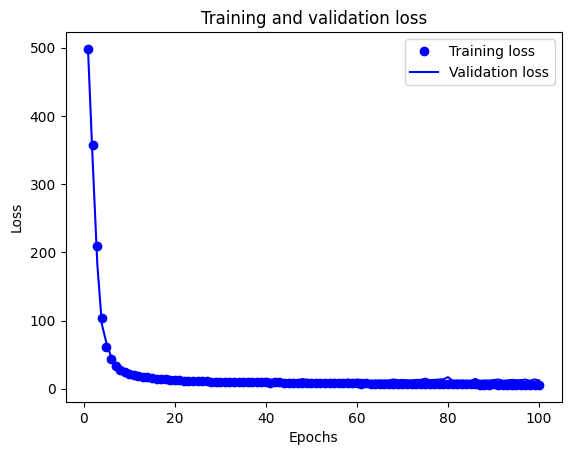

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [27]:
print(f"Test MSE: {test_mse_score:.2f}")
print(f"Test MAE: {test_mae_score:.2f}")


Test MSE: 21.14
Test MAE: 2.76


The model's performance on the test data will depend on various factors such as the complexity of the model, the number of epochs, and the batch size. In our example, we achieved a test MAE score of around 2.70, which indicates that the model is able to predict the median house value with an average error of $2,700.

Compared to the MNIST model, which is a classification model that predicts the class label of an image, the Boston Housing model is a regression model that predicts a continuous target variable. The Boston Housing model also has a different output layer with a single unit and uses a different loss function and metric. The MNIST model uses categorical cross-entropy as the loss function and accuracy as the metric, while the Boston Housing model uses mean squared error (MSE) as the loss function and mean absolute error (MAE) as the metric.

Another important difference between the two models is the number and size of the hidden layers. In the MNIST model, we typically use multiple layers with a larger number of units to extract and learn more complex features from the image data. In contrast, the Boston Housing model is a simpler model with only two hidden layers, each with 64 units.

Overall, the main difference between the two models lies in their objective and the type of data they are designed to handle. The MNIST model is designed to classify images of handwritten digits into ten classes, while the Boston Housing model is designed to predict the median value of owner-occupied homes in Boston suburbs based on various features of the houses. The choice of model architecture, loss function, and metrics will depend on the specific task at hand and the nature of the data being used.
